<a href="https://colab.research.google.com/github/FereBell/IntroduccionDeepLearning/blob/master/Mi_primera_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

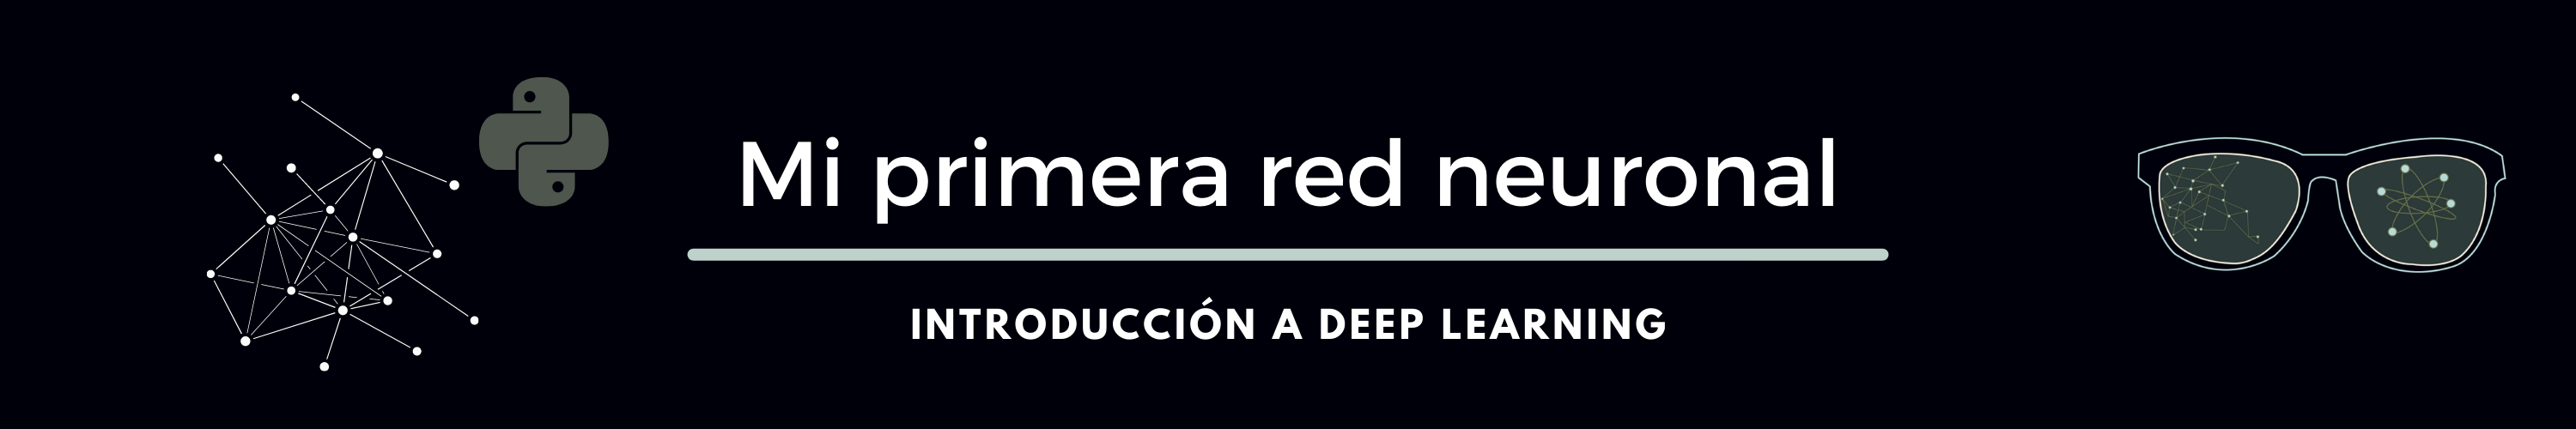
---



## Dvisión de los datos en entrenamiento y validación

In [ ]:
import os
import shutil

datos_original_c= 'E:/Base de datos/B/Cat'
datos_original_d= 'E:/Base de datos/B/Dog'


base_n= 'E:/Base de datos/B/PG'
os.mkdir(base_n)

entrenamiento= os.path.join(base_n, 'datos_entrenamiento')
os.mkdir(entrenamiento)
validacion= os.path.join(base_n, 'datos_validacion')
os.mkdir(validacion)

ent_gatos= os.path.join(entrenamiento, 'gatos')
os.mkdir(ent_gatos)
ent_perros= os.path.join(entrenamiento, 'perros')
os.mkdir(ent_perros)

val_gatos= os.path.join(validacion, 'gatos')
os.mkdir(val_gatos)
val_perros= os.path.join(validacion, 'perros')
os.mkdir(val_perros)

cnombs= ['{}.jpg' .format(i) for i in range(10000)]
dnombs= ['{}.jpg' .format(i) for i in range(10000)]
for fnomb, gnomb in zip(cnombs, dnombs):
    
    if gnomb != '666.jpg':
        fc= os.path.join(datos_original_c, fnomb)
        dc= os.path.join(ent_gatos, fnomb)
        shutil.copyfile(fc, dc)
    
        fd= os.path.join(datos_original_d, gnomb)
        dd= os.path.join(ent_perros, gnomb)
        shutil.copyfile(fd, dd)

cnombs= ['{}.jpg' .format(i) for i in range(10000, 12000)]
dnombs= ['{}.jpg' .format(i) for i in range(10000, 12000)]
for fnomb, gnomb in zip(cnombs, dnombs):
    
    if gnomb != '11702.jpg':
        fc= os.path.join(datos_original_c, fnomb)
        dc= os.path.join(val_gatos, fnomb)
        shutil.copyfile(fc, dc)
    
        fd= os.path.join(datos_original_d, gnomb)
        dd= os.path.join(val_perros, gnomb)
        shutil.copyfile(fd, dd)

## Arquitectura de la red convolucional

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, regularizers, models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(254, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(254, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Alimentación de la red y entrenameinto

In [ ]:
entrenamiento_dir= 'E:/Base de datos/BS/PG/datos_entrenamiento'
validacion_dir= 'E:/Base de datos/BS/PG/datos_validacion'


ent_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

ent_gen = ent_datagen.flow_from_directory(entrenamiento_dir,
                                          target_size=(300, 300),
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=True,
                                          color_mode='grayscale')

val_gen = val_datagen.flow_from_directory(validacion_dir,
                                          target_size=(300, 300),
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=True,
                                          color_mode='grayscale')

history = model.fit(ent_gen,
                    steps_per_epoch=624,
                    epochs=30,
                    validation_data=val_gen,
                    validation_steps=124)

## Revision de la exactitud y perdida, durante el entrenameinto

In [ ]:
import matplotlib.pyplot as plt

exac = history.history['acc']
val_exac = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(exac) + 1)
plt.plot(epochs, exac, 'bo', label='Entrenamiento exac')
plt.plot(epochs, val_exac, 'b', label='Validación exac')
plt.title('Exactitud en el entrenamiento y validación')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Entrenamiento y validación loss')
plt.legend()
plt.show()

## Prueba de la red con imagánes personales

In [ ]:
import numpy as np
import cv2 as cv

t= 'E:/Base de datos/BS/kp.jpeg'
#t= 'E:/Base de datos/BS/michi.jpeg'

img_array = cv.cvtColor(cv.resize(cv.imread(t),(300,300)),cv.COLOR_BGR2GRAY)
img_array= img_array/255.0
new_array= np.array(img_array).reshape(-1,300,300,1)

plt.imshow(new_array[0], cmap='gray')
plt.show()

val_preds = model.predict(new_array)
val_preds= np.around(val_preds)

if val_preds== 0:
    print("En la imagen hay un gato")
else:
    print("En la imagen hay un perro")